In [1]:
import os
import numpy as np
import pandas as pd
import napari
from tifffile import imread,imwrite
from skimage.io import imsave

import matplotlib.pyplot as plt

In [2]:
df_path = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\230117_exp_summary.pkl'

examples_path = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\example_images'

path_save = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\example_images\visualizations'

px_size = 0.325 # [um]

selected_wells = ['T3937_39_R000','T3737_9_2_R000','T3937_39_R003','T3737_9_2_R003']
im_names = ['T0','T0 (cultured)','T24','T48']
selected_regions = [0,0,0,0]

In [3]:
# define scale bar length

scale_bar = 50 #[um]

scale_bar_px = int(scale_bar/px_size)

In [4]:
df = pd.read_pickle(df_path)
df

,file_name,exp_dir,im_path,slide,well,exp,marker,dye,im_round,density,donor,treatment
0,T3737_9_2_1.0.4_R000_Cy3_CycB1-AF555_FINAL_AFR...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_C...,T3737_9_2,R000,T3737_9_2_R000,CycB1,Cy3,1,150,D1,0
1,T3737_9_2_1.0.4_R000_Cy5_CD8a-AF647_FINAL_AFR_...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_C...,T3737_9_2,R000,T3737_9_2_R000,CD8a,Cy5,1,150,D1,0
2,T3737_9_2_1.0.4_R000_Cy7_CD44-AF750_FINAL_AFR_...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_C...,T3737_9_2,R000,T3737_9_2_R000,CD44,Cy7,1,150,D1,0
3,T3737_9_2_1.0.4_R000_DAPI__FINAL_F.tif,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_D...,T3737_9_2,R000,T3737_9_2_R000,DNA,DAPI,1,150,D1,0
4,T3737_9_2_1.0.4_R000_FITC_PCNA-AF488_FINAL_AFR...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_F...,T3737_9_2,R000,T3737_9_2_R000,PCNA,FITC,1,150,D1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,T3937_39_4.0.4_R007_Cy3_p21-AF555_FINAL_AFR_F.tif,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_Cy3...,T3937_39,R007,T3937_39_R007,p21,Cy3,4,200,D2,24
156,T3937_39_4.0.4_R007_Cy5_FoxP3-AF647_FINAL_AFR_...,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_Cy5...,T3937_39,R007,T3937_39_R007,FoxP3,Cy5,4,200,D2,24
157,T3937_39_4.0.4_R007_Cy7_cycB2-AF750_FINAL_AFR_...,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_Cy7...,T3937_39,R007,T3937_39_R007,cycB2,Cy7,4,200,D2,24
158,T3937_39_4.0.4_R007_DAPI__FINAL_F.tif,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_DAP...,T3937_39,R007,T3937_39_R007,DNA,DAPI,4,200,D2,24


In [9]:
sel_marker = 'DNA'

im_selected = []

for sel_exp,sel_reg in zip(selected_wells,selected_regions):
    
    im_name = f'{sel_exp}_{sel_marker}_region_{str(sel_reg).zfill(2)}.tif'
    im_path = os.path.join(examples_path,sel_exp,f'region_{str(sel_reg).zfill(2)}',im_name)

    im = imread(im_path)

    im_selected.append(im)

# concatenate images
im_combined = np.concatenate(im_selected, axis=1)

viewer = napari.Viewer()

viewer.add_image(im_combined)

<Image layer 'im_combined' at 0x271578a5970>

In [6]:
my_contrast = viewer.layers['im_combined'].contrast_limits

im_rgb_list = []

for im,sel_exp,sel_reg in zip(im_selected,selected_wells,selected_regions):

    im = (im - my_contrast[0])/(my_contrast[1] - my_contrast[0])
    im[im<0] = 0
    im[im>1] = 1

    im_rgb = np.array([im,im,im])*255
    im_rgb = np.moveaxis(im_rgb,0,2)

    # add scale bar
    im_rgb[-53:-50,-(20+scale_bar_px):-20,:] = 255

    im_rgb = im_rgb.astype('uint8')

    im_path = os.path.join(path_save,f'{sel_exp}_{sel_marker}_region_{str(sel_reg).zfill(2)}_rescaled.jpg')

    imsave(im_path,im_rgb)

    # collect for a joint image
    im_rgb_list.append(im_rgb)

C:\Users\Stallab\AppData\Local\Temp\ipykernel_16744\3280568896.py:21: UserWarning: D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\example_images\visualizations\T3937_39_R000_CycB1_region_00_rescaled.jpg is a low contrast image
  imsave(im_path,im_rgb)
C:\Users\Stallab\AppData\Local\Temp\ipykernel_16744\3280568896.py:21: UserWarning: D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\example_images\visualizations\T3737_9_2_R000_CycB1_region_00_rescaled.jpg is a low contrast image
  imsave(im_path,im_rgb)
C:\Users\Stallab\AppData\Local\Temp\ipykernel_16744\3280568896.py:21: UserWarning: D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\example_images\visualizations\T3937_39_R003_CycB1_region_00_rescaled.jpg is a low contrast image
  imsave(im_path,im_rgb)
C:\Users\Stallab\AppData\Local\Temp\ipykernel_16744\3280568896.py:21: UserWarning: D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\example_images\visualizations\T3737_9_2_R003_CycB1_region_00_rescaled.jpg is a low contrast image

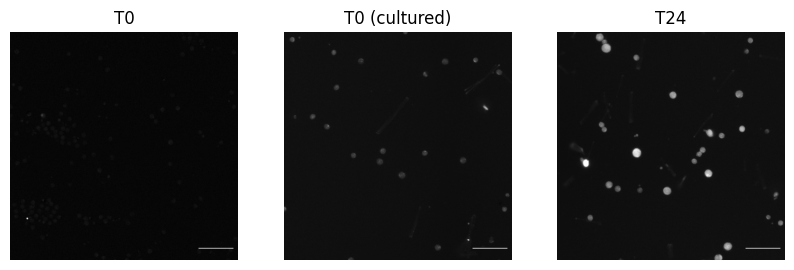

In [58]:
fig,axes = plt.subplots(1,len(im_rgb_list),figsize = (10,4))

for im_rgb,ax,sel_exp in zip(im_rgb_list,axes,im_names):

    ax.imshow(im_rgb)
    ax.set_axis_off()

    ax.set_title(sel_exp)

plt.savefig(os.path.join(path_save,f'{sel_marker}.jpg'))